In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importing dataset
data=pd.read_csv('D:\\Python Lectures\\DataSet\\train.csv')

In [3]:
#let's see the first five rows of dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Shape of dataframe(rows x columns)
data.shape

(891, 12)

In [5]:
#Exploring the dataset 
surived= data['Survived'].isin([1])
gender= data['Sex'].str.contains('female')
join=data[surived & gender]
join.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
join['Survived'].isin([1])
print(len(join))


233


In [7]:
#Basic statistics on all numeric columns
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data['Fare'].max()

512.3292

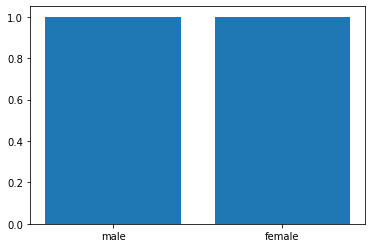

In [9]:
#get the years 
x = data['Sex'].values
#get the values
y= data['Survived'].values

#create
plt.bar(x,y)
plt.show()

Percentage of females who survived 74.20382165605095
Percentage of male who survived 18.890814558058924


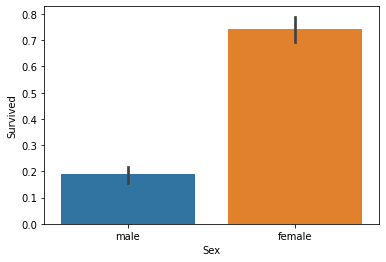

In [10]:
#draw a bar plot of suevival by sex
sns.barplot(x='Sex', y='Survived',data=data)

print("Percentage of females who survived" ,data['Survived'][data['Sex']=='female'].value_counts(normalize=True)[1]*100)
print('Percentage of male who survived',data['Survived'][data['Sex']=='male'].value_counts(normalize=True)[1]*100)

Percentage of calss 1 who survived 62.96296296296296
Percentage of calss 2 who survived 47.28260869565217
Percentage of calss 3 who survived 24.236252545824847


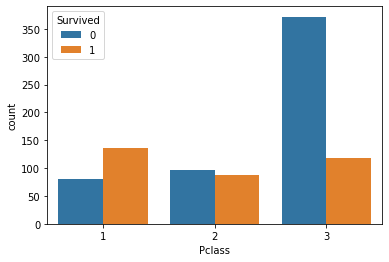

In [31]:

sns.countplot(x='Pclass', hue='Survived', data=data)
print("Percentage of calss 1 who survived" ,data['Survived'][data['Pclass']==1].value_counts(normalize=True)[1]*100)
print("Percentage of calss 2 who survived" ,data['Survived'][data['Pclass']==2].value_counts(normalize=True)[1]*100)
print("Percentage of calss 3 who survived" ,data['Survived'][data['Pclass']==3].value_counts(normalize=True)[1]*100)#[1] is for the survived people


In [12]:
a=np.array(data['SibSp'])

In [13]:
np.unique(a)

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

Percentage of siblings 1 who survived 53.588516746411486
Percentage of siblings 2 who survived 46.42857142857143
Percentage of siblings 3 who survived 25.0


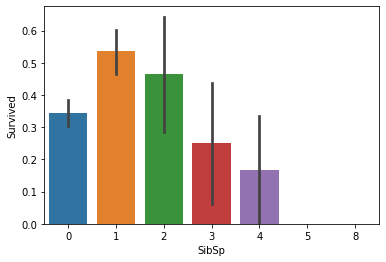

In [14]:
sns.barplot(x='SibSp', y='Survived',data=data)
print("Percentage of siblings 1 who survived" ,data['Survived'][data['SibSp']==1].value_counts(normalize=True)[1]*100)
print("Percentage of siblings 2 who survived" ,data['Survived'][data['SibSp']==2].value_counts(normalize=True)[1]*100)
print("Percentage of siblings 3 who survived" ,data['Survived'][data['SibSp']==3].value_counts(normalize=True)[1]*100)


Percentage of who had cabin and survived 66.66666666666666
Percentage of who  survived without cabin 29.985443959243085


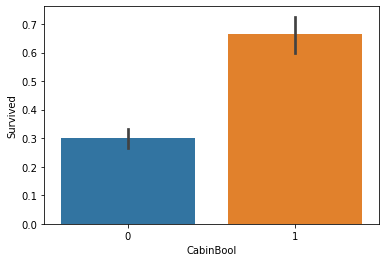

In [15]:
data["CabinBool"] = (data["Cabin"].notnull().astype('int'))
sns.barplot(x='CabinBool', y='Survived',data=data)
print("Percentage of who had cabin and survived" ,data['Survived'][data['CabinBool']==1].value_counts(normalize=True)[1]*100)
print("Percentage of who  survived without cabin" ,data['Survived'][data['CabinBool']==0].value_counts(normalize=True)[1]*100)



Xtrain: all 80% column except survied  
Xtest: all 20% column except survied  
ytrain: 80% values of survied  
ytest: 20% values of survied  

In [16]:
data.shape

(891, 13)

## Building Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 


In [19]:
df=pd.read_csv(r'D:\Python Lectures\DataSet\train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [20]:
df=df.dropna()

In [21]:
df=df.drop(['Embarked', 'Name','Cabin','Ticket'],axis=1)

In [22]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [23]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1),
                                                df['Survived'],test_size=0.20,random_state=3)

In [24]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predictions= logmodel.predict(x_test)
x_test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
148,149,2,0,36.5,0,2,26.00
10,11,3,1,4.0,1,1,16.70
340,341,2,0,2.0,1,1,26.00
763,764,1,1,36.0,1,2,120.00
585,586,1,1,18.0,0,2,79.65


In [26]:
accuracy = logmodel.score(x_test,y_test)
print(accuracy*100,'%')

70.27027027027027 %


In [27]:
predictions

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.82      0.72      0.77        25

    accuracy                           0.70        37
   macro avg       0.68      0.69      0.68        37
weighted avg       0.73      0.70      0.71        37



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[ 8,  4],
       [ 7, 18]], dtype=int64)